<a href="https://colab.research.google.com/github/kranthik01/fmml_assignments-/blob/main/Lab_18_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Many to Many RNNs

These types of networks take a sequence as an input and give a sequence as an output. It can be used in problems like machine translation, named entity recognition, POS tagging and others.

In this project you would work on different types of RNNs on the task of POS tagging. 

In [ ]:
import nltk
nltk.download('treebank')
nltk.download('brown')
nltk.download('universal_tagset')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [ ]:
## We will use Treebank from NLTK as dataset
from nltk.corpus import treebank
from nltk.corpus import brown

In [ ]:
# load POS tagged corpora from NLTK
treebank_corpus = treebank.tagged_sents(tagset='universal')
brown_corpus = brown.tagged_sents(tagset='universal')
tagged_sentences = treebank_corpus + brown_corpus


In [ ]:
print("Number of sentences: " + str(len(tagged_sentences)))
tagged_sentences[0]

Number of sentences: 61254


[('Pierre', 'NOUN'),
 ('Vinken', 'NOUN'),
 (',', '.'),
 ('61', 'NUM'),
 ('years', 'NOUN'),
 ('old', 'ADJ'),
 (',', '.'),
 ('will', 'VERB'),
 ('join', 'VERB'),
 ('the', 'DET'),
 ('board', 'NOUN'),
 ('as', 'ADP'),
 ('a', 'DET'),
 ('nonexecutive', 'ADJ'),
 ('director', 'NOUN'),
 ('Nov.', 'NOUN'),
 ('29', 'NUM'),
 ('.', '.')]

This is a many-to-many problem, each data point will be a different sentence of the corpora.

Each data point will have multiple words in the input sequence. This is what we will refer to as X.

Each word will have its correpsonding tag in the output sequence. This what we will refer to as Y.



In [ ]:
X = [] # store input sequence
Y = [] # store output sequence

for sentence in tagged_sentences:
    X_sentence = []
    Y_sentence = []
    for entity in sentence:         
        X_sentence.append(entity[0])  # entity[0] contains the word
        Y_sentence.append(entity[1])  # entity[1] contains corresponding tag
        
    X.append(X_sentence)
    Y.append(Y_sentence)


In [ ]:
num_words = len(set([word.lower() for sentence in X for word in sentence]))
num_tags   = len(set([word.lower() for sentence in Y for word in sentence]))


In [ ]:
print("Total number of tagged sentences: {}".format(len(X)))
print("Vocabulary size: {}".format(num_words))
print("Total number of tags: {}".format(num_tags))

Total number of tagged sentences: 61254
Vocabulary size: 53232
Total number of tags: 12


In [ ]:
## Task - 1
## Vectorize each sentence and pad each sequence to a fixed length

In [ ]:
print('sample X: ', X[0], '\n')
print('sample Y: ', Y[0], '\n')

sample X:  ['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'Nov.', '29', '.'] 

sample Y:  ['NOUN', 'NOUN', '.', 'NUM', 'NOUN', 'ADJ', '.', 'VERB', 'VERB', 'DET', 'NOUN', 'ADP', 'DET', 'ADJ', 'NOUN', 'NOUN', 'NUM', '.'] 



In [ ]:
print("Length of first input sequence  : {}".format(len(X[0])))
print("Length of first output sequence : {}".format(len(Y[0])))

Length of first input sequence  : 18
Length of first output sequence : 18


In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer

In [ ]:
word_tokenizer = Tokenizer()                      # instantiate tokeniser
word_tokenizer.fit_on_texts(X)                    # fit tokeniser on data
X_encoded = word_tokenizer.texts_to_sequences(X)  # use the tokeniser to encode input sequence                                                

In [ ]:
## Task - 2 
## Convert Y to categorical and pad it as input
tag_tokenizer = Tokenizer()
tag_tokenizer.fit_on_texts(Y)
Y_encoded = tag_tokenizer.texts_to_sequences(Y)


In [ ]:
## Padding
#X_encoded is the encoded form X from Task-1
MAX_SEQ_LENGTH = 100  # sequences greater than 100 in length will be truncated

X_padded = pad_sequences(X_encoded, maxlen=MAX_SEQ_LENGTH, padding="pre", truncating="post")
# Pad for Y
Y_padded = pad_sequences(Y_encoded, maxlen=MAX_SEQ_LENGTH, padding="pre", truncating="post")
X, Y = X_padded, Y_padded


In [ ]:
# Change Y to categorical
Y = to_categorical(Y)

In [ ]:
print(Y.shape)

(61254, 100, 13)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


In [ ]:
### Split data in training and testing 
TEST_SIZE = 0.15
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=TEST_SIZE, random_state=4)


In [ ]:
print("TRAINING DATA")
print('Shape of input sequences: {}'.format(X_train.shape))
print('Shape of output sequences: {}'.format(Y_train.shape))
print("-"*50)
print("TESTING DATA")
print('Shape of input sequences: {}'.format(X_test.shape))
print('Shape of output sequences: {}'.format(Y_test.shape))


TRAINING DATA
Shape of input sequences: (52065, 100)
Shape of output sequences: (52065, 100, 13)
--------------------------------------------------
TESTING DATA
Shape of input sequences: (9189, 100)
Shape of output sequences: (9189, 100, 13)


In [ ]:
NUM_CLASSES = Y.shape[2]

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense, Input
from keras.layers import TimeDistributed
from keras.layers import LSTM, GRU, Bidirectional, SimpleRNN, RNN
from keras.models import Model

In [ ]:
X[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,  5594, 21728,     2,  9068,   105,   158,     2,    53,
        1748,     1,   344,    18,     7, 13148,   880,  2681,  4000,
           3], dtype=int32)

In [ ]:
### Task - 3 Complete the two lines

In [ ]:
rnn_model = Sequential()

# create embedding layer - usually the first layer in text problems
rnn_model.add(Embedding(num_words + 1,         # vocabulary size - number of unique words in data
                        output_dim    =  300,          # length of vector with which each word is represented
                        input_length  =  MAX_SEQ_LENGTH,          # length of input sequence
                        trainable     =  False                    # False - don't update the embeddings
))

# add an any RNN layer which contains 64 RNN cells
rnn_model.add(SimpleRNN(64, 
              return_sequences=True))

# add time distributed (output at each sequence) layer
rnn_model.add(TimeDistributed(Dense(NUM_CLASSES, activation='softmax')))

In [ ]:
rnn_model.compile(loss      =  'categorical_crossentropy',
                  optimizer =  'adam',
                  metrics   =  ['acc'])


In [ ]:
rnn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 300)          15969900  
                                                                 
 simple_rnn (SimpleRNN)      (None, 100, 64)           23360     
                                                                 
 time_distributed (TimeDistr  (None, 100, 13)          845       
 ibuted)                                                         
                                                                 
Total params: 15,994,105
Trainable params: 24,205
Non-trainable params: 15,969,900
_________________________________________________________________


In [ ]:
rnn_training = rnn_model.fit(X_train, Y_train, batch_size=256, epochs=10)


Epoch 1/10
204/204 [==============================] - 33s 156ms/step - loss: 0.6169 - acc: 0.8254
Epoch 2/10
204/204 [==============================] - 34s 164ms/step - loss: 0.3984 - acc: 0.8811
Epoch 3/10
204/204 [==============================] - 33s 160ms/step - loss: 0.3105 - acc: 0.9052
Epoch 4/10
204/204 [==============================] - 32s 156ms/step - loss: 0.2590 - acc: 0.9193
Epoch 5/10
204/204 [==============================] - 32s 158ms/step - loss: 0.2254 - acc: 0.9295
Epoch 6/10
204/204 [==============================] - 32s 154ms/step - loss: 0.2017 - acc: 0.9367
Epoch 7/10
204/204 [==============================] - 31s 154ms/step - loss: 0.1849 - acc: 0.9414
Epoch 8/10
204/204 [==============================] - 32s 158ms/step - loss: 0.1725 - acc: 0.9447
Epoch 9/10
204/204 [==============================] - 32s 154ms/step - loss: 0.1630 - acc: 0.9470
Epoch 10/10
204/204 [==============================] - 33s 160ms/step - loss: 0.1551 - acc: 0.9490


In [ ]:
from matplotlib import pyplot as plt

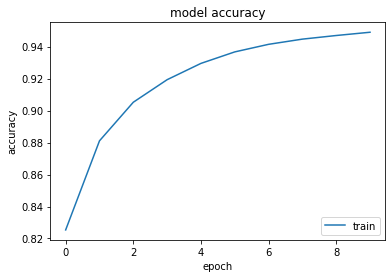

In [ ]:
plt.plot(rnn_training.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()


In [ ]:
loss, accuracy = rnn_model.evaluate(X_test, Y_test, verbose = 1)
print("Loss: {0},\nAccuracy: {1}".format(loss, accuracy))

288/288 [==============================] - 4s 14ms/step - loss: 0.1518 - acc: 0.9503
Loss: 0.15176598727703094,
Accuracy: 0.9502644538879395


In [ ]:
## Task - 4 How did turning the trainable parameter in Embedding layer into True effect the performance?

## It will update embeddings

In [ ]:
## Task - 5 How else can you improve the accuracy? 

##We can improve the accuracy by using various other feature extractions. 

In [ ]:
## Task - 6 Use other RNNs present in Keras like LSTM, GRU, BiLSTMs, BiGRU and compare any three models with RNNs 

LSTM

In [ ]:
lstm_model = Sequential()
lstm_model.add(Embedding(num_words + 1,         # vocabulary size - number of unique words in data
                         output_dim    = 300,          # length of vector with which each word is represented
                         input_length  = MAX_SEQ_LENGTH,          # length of input sequence
                         trainable     = True                     # True - update embeddings_weight matrix
))
lstm_model.add(LSTM(64, return_sequences=True))
lstm_model.add(TimeDistributed(Dense(NUM_CLASSES, activation='softmax')))

In [ ]:
lstm_model.compile(loss      =  'categorical_crossentropy',
                   optimizer =  'adam',
                   metrics   =  ['acc'])

In [ ]:
lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 300)          15969900  
                                                                 
 lstm (LSTM)                 (None, 100, 64)           93440     
                                                                 
 time_distributed_1 (TimeDis  (None, 100, 13)          845       
 tributed)                                                       
                                                                 
Total params: 16,064,185
Trainable params: 16,064,185
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lstm_training = lstm_model.fit(X_train, Y_train, batch_size=128, epochs=10)

Epoch 1/10
407/407 [==============================] - 184s 446ms/step - loss: 0.3072 - acc: 0.9232
Epoch 2/10
407/407 [==============================] - 178s 438ms/step - loss: 0.0351 - acc: 0.9897
Epoch 3/10
407/407 [==============================] - 179s 440ms/step - loss: 0.0228 - acc: 0.9921
Epoch 4/10
407/407 [==============================] - 175s 429ms/step - loss: 0.0188 - acc: 0.9933
Epoch 5/10
407/407 [==============================] - 174s 428ms/step - loss: 0.0165 - acc: 0.9941
Epoch 6/10
407/407 [==============================] - 174s 427ms/step - loss: 0.0148 - acc: 0.9947
Epoch 7/10
407/407 [==============================] - 175s 429ms/step - loss: 0.0134 - acc: 0.9952
Epoch 8/10
407/407 [==============================] - 174s 427ms/step - loss: 0.0121 - acc: 0.9957
Epoch 9/10
407/407 [==============================] - 173s 425ms/step - loss: 0.0109 - acc: 0.9961
Epoch 10/10
407/407 [==============================] - 174s 427ms/step - loss: 0.0099 - acc: 0.9966


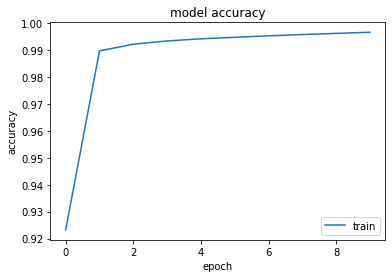

In [ ]:
# visualise training history
plt.plot(lstm_training.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()